In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from components import *

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [2]:
BATCH_SIZE = 128
INPUT_SIZE = Generator.INPUT_SIZE
K_STEPS = 2
dataloader = get_data_loader(train=True, batch_size=BATCH_SIZE)

In [3]:
def discriminator_loss(D_x: torch.Tensor, D_G_z: torch.Tensor):
    loss = torch.log(D_x) + torch.log(1 - D_G_z)
    return -torch.mean(loss)

def generator_loss(D_G_z: torch.Tensor):
    return -torch.mean(torch.log(D_G_z))
    #return torch.mean(torch.log(1 - D_G_z))

In [4]:
netG = Generator().to(device)
netD = Discriminator().to(device)
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

G_losses, D_losses = [], []
fake_img_list = []

In [5]:
def train(num_epochs = 1):
    for epoch in range(num_epochs):
        print('   EPOCH: ', epoch)
        for k in range(K_STEPS):
            for i, data in enumerate(dataloader, 0):
                data_real = data[0].to(device)
                noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)

                # ===========TRAIN_DISCRIMINSTOR============
                netD.zero_grad()
                output_real = netD(data_real).view(-1)
                D_x = output_real.mean().item()

                data_fake = netG(noise)
                output_fake = netD(data_fake.detach()).view(-1)

                D_G_z1 = output_fake.mean().item()

                errD = discriminator_loss(output_real, output_fake)
                errD.backward()

                optimizerD.step()

        # =============TRAIN_GENERATOR=============
        netG.zero_grad()
        noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)
        data_fake = netG(noise)
        output = netD(data_fake).view(-1)
        errG = generator_loss(output)

        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Output training stats
        print('[%.3d/%d]   Loss_D: %.4f   Loss_G: %.4f   D(x): %.4f   D(G(z)): %.4f / %.4f'
              % (i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        G_losses.append(errG.item())
        D_losses.append(errD.item())

        with torch.no_grad():
            fake_img_list.append(generate_images(netG, new_noise=False, return_grid=True))


## TRAINING PROCESS

In [6]:
train(num_epochs=5)

   EPOCH:  0
[467/468]   Loss_D: 0.0000   Loss_G: 14.1311   D(x): 1.0000   D(G(z)): 0.0000 / 0.0000
   EPOCH:  1
[467/468]   Loss_D: 0.0000   Loss_G: 20.9882   D(x): 1.0000   D(G(z)): 0.0000 / 0.0000
   EPOCH:  2


KeyboardInterrupt: 

In [7]:
train(num_epochs=3)

   EPOCH:  0
[000/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[100/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[200/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[300/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[400/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
   EPOCH:  1
[000/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[100/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[200/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[300/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[400/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
   EPOCH:  2
[000/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[100/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[

In [8]:
train(num_epochs=3)

   EPOCH:  0
[000/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[100/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[200/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[300/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[400/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
   EPOCH:  1
[000/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[100/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[200/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[300/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[400/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
   EPOCH:  2
[000/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[100/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[

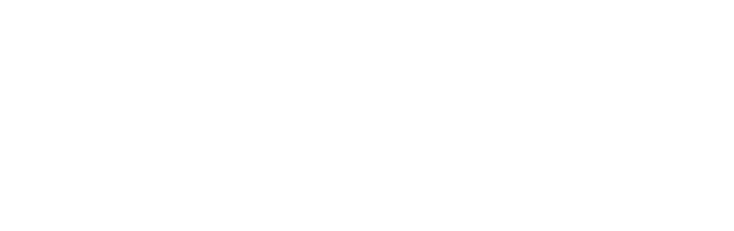

In [7]:
fig = plt.figure(figsize=(16,4))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in fake_img_list]
ani = animation.ArtistAnimation(fig, ims, interval=250, repeat_delay=1000, blit=False)
HTML(ani.to_jshtml())

In [ ]:
generate_images(netG)